# Experiment Lab Malis


In [57]:
from perceptron import *
perceptron = Perceptron(64,0.1)

In [58]:
from sklearn.datasets import load_digits
a = load_digits(n_class=2)

In [59]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(a.data, a.target, test_size=0.2, random_state=42)

# Further split the training set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Print the shapes of the resulting datasets
print("Training set shape:", X_train.shape)
print("Validation set shape:", X_val.shape)
print("Test set shape:", X_test.shape)

X_train = (X_train.astype('float32')/16).tolist()
X_val = (X_val.astype('float32')/16).tolist()
X_test = (X_test.astype('float32')/16).tolist()
y_train = (y_train.astype('float32')).tolist()
y_val = (y_val.astype('float32') ).tolist() 
y_test = (y_test.astype('float32')).tolist()


Training set shape: (230, 64)
Validation set shape: (58, 64)
Test set shape: (72, 64)


In [60]:
x = X_train[25]
y = y_train[25]
# print(perceptron.predict(x), y)
# for i in range(2000):
#     perceptron.retropropagation(x, [y])
# print(perceptron.predict(x), y)

# print(perceptron.propagation(x),y)
# for i in range(2000):
#     perceptron.retropropagation(x, [y])
# print(perceptron.propagation(x),y)

# nn = NeuralNetwork([64,1,1],0.1)
# print(nn.propagation(x))
# for i in range(2000):
#     nn.retropropagation([1. for i in range(64)], [y])
# print(nn.propagation(x))
from copy import deepcopy
from numpy import inf

def train_perceptron(epsilon, perceptron):
    errors = [0]
    error = sum([perceptron.predict(X_train[i]) - y_train[i] for i in range(len(X_train))])**2
    errors.append(error)
    while (errors[-1]-errors[-2])**2 > 0.001:
        for i in range(len(X_train)):
            perceptron.train(X_train[i],y_train[i])
        # if i%100 == 0:
        #     print(i)
        error = sum([(perceptron.predict(X_train[i]) - y_train[i])**2 for i in range(len(X_train))])/len(X_train)
        errors.append(error)

    return errors[-1]
def validate(perceptron):
    validationError = sum([(perceptron.predict(X_val[i]) - y_val[i])**2 for i in range(len(X_val))])/len(X_val)
    return validationError

def error_by_epsilon(epsilon):
    perceptron = Perceptron(64,0.5)
    error = train_perceptron(epsilon, perceptron)
    validationError = validate(perceptron)
    return error,validationError



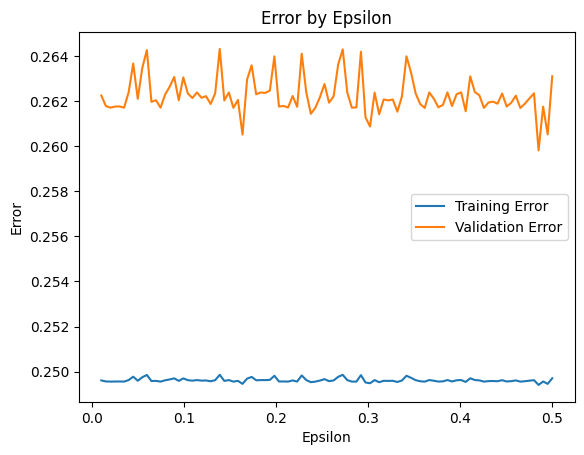

In [61]:
from scipy import *
import matplotlib.pyplot as plt
from numpy import *

y_plot = [error_by_epsilon(epsilon) for epsilon in linspace(0.01,0.5,100)]
x_plot = linspace(0.01,0.5,100)
plt.plot(x_plot, [y[0] for y in y_plot], label='Training Error')
plt.plot(x_plot, [y[1] for y in y_plot], label='Validation Error')
plt.title('Error by Epsilon')
plt.xlabel('Epsilon')
plt.ylabel('Error')
plt.legend()
plt.show()


In [65]:
nn = NeuralNetwork([1,100,100,100,1],0.5)
for i in range(100):
    nn.retropropagation([0.],[1.])
print(nn.propagation([0.]))
# for i in range(7):
#     print(i,end='\r')
#     for j in range(len(X_train)):
#         nn.retropropagation(X_train[j], [y_train[j]])
# error = sum([(nn.propagation(X_train[i])[0] - y_train[i])**2 for i in range(len(X_train))])/len(X_train)
# error_val = sum([(nn.propagation(X_val[i])[0] - y_val[i])**2 for i in range(len(X_val))])/len(X_val)
# print(error, error_val)

[0.9999999974437621]


[64,32,16,8,4,2,1] 0.24948665948398244 0.2609402569334648


###

Conclusion: If there are not enough perceptrons to discriminate between handwritten 1s and 0s, the model's performance will be affected. Here are some consequences:

Even if we have a low tolerance to errors, the error difference between training and validation datas are huge

For higher error tolerance (> 0.25), the error is almost constant, a consequence of the perceptron not beeing accurate enough